In [1]:
import numpy as np
import pandas as pd
# Data visualisation & Preparation
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
sns.set(color_codes=True)
import scikitplot as skplt
from sklearn import preprocessing as prep
from sklearn.utils import resample
import imblearn
from imblearn.over_sampling import SMOTE

# Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# Confusion Matrix
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import plot_confusion_matrix
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn import tree
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# KNN
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score

# Support Vector Classifications
from sklearn.svm import SVC




In [2]:
credit = pd.read_csv('default.csv')
credit

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -1  ...          0          0          0         0       689   
1          0  ...       3272       3455       3261         0      1000   
2          0  ...      14331      14948      15549      1518      1500   
3          0  ...      28314      28959      29547      2000      2019   
4          0  ...      20940      19146      19131      2000     36681   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...      88004      31237      15980      8500     20000   
29996     -1  ...       8979       5190          0      1837      3526   
29997     -1  ...      20878      20582      19357         0         0   
29998      0  ...      52774      11855      48944     85900      3409   
29999      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0             0         0         0         0                           1  
1          1000      1000         0      2000                           1  
2          1000      1000      1000      5000                           0  
3          1200      1100      1069      1000                           0  
4         10000      9000       689       679                           0  
...         ...       ...       ...       ...                         ...  
29995      5003      3047      5000      1000                           0  
29996      8998       129         0         0                           0  
29997     22000      4200      2000      3100                           1  
29998      1178      1926     52964      1804                           1  
29999      1430      1000      1000      1000                           1  

[30000 rows x 25 columns]

In [3]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [4]:
credit.describe()

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default payment next month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 25 columns]

In [5]:
# rename the target column
credit.rename(columns={"default payment next month": "default"}, inplace = True)

In [6]:
# check unique values in different features
print(credit.EDUCATION.unique())
print(credit.MARRIAGE.unique())

[2 1 3 5 4 6 0]
[1 2 3 0]


In [7]:
# 上面可以看见Education多出来几类

# 把教育程度4,5,6，0不知道是啥的类别全归为others
fil = (credit['EDUCATION'] == 5) | (credit['EDUCATION'] == 6) | (credit['EDUCATION'] == 0)
credit.loc[fil, 'EDUCATION'] = 4
credit['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [8]:
# 婚姻状况同样的操作
fil = (credit['MARRIAGE'] == 0)
credit.loc[fil, 'MARRIAGE'] = 3
credit['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [9]:
print(credit.EDUCATION.unique())
print(credit.MARRIAGE.unique())

[2 1 3 4]
[1 2 3]


# EDA

plt.figure(figsize = (30,25))
hm = credit_final.corr()

sns.heatmap(hm, cmap = 'vlag', annot=True)
plt.title('The Correlation Heatmap')
plt.show()

# 数据非均衡（Imbalanced Data）

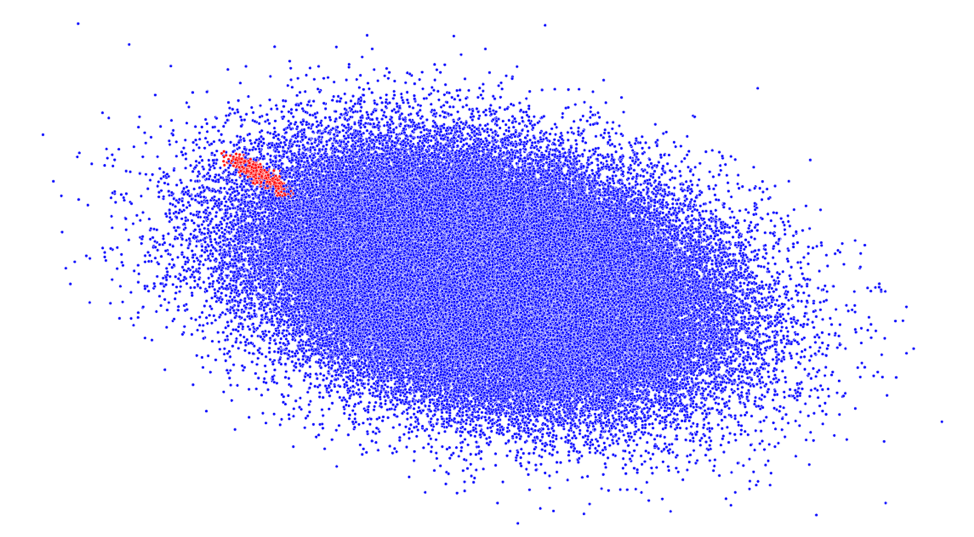
简单说你的分类器训练集数据不是5/5开或者6/4开，预测结果就很容易具有欺骗性

比如：选取的样本98%客户都违约，那只要预测全猜违约，准确率就能达到98%...这显然不科学...

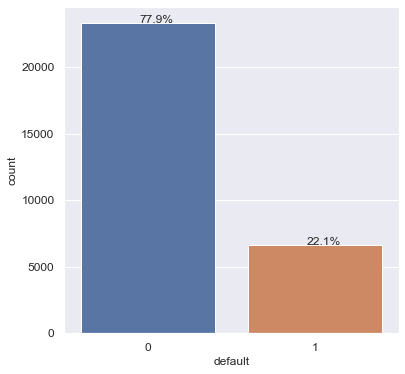

In [10]:
# check data balance
def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

plt.figure(figsize = (6,6))
ax = sns.countplot('default', data = credit)
plt.xticks(size = 12)
plt.xlabel('default', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)

without_hue(ax, credit.default)

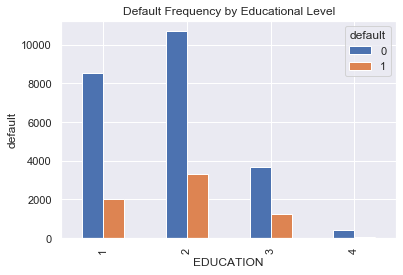

In [11]:
# Eduation
# 1：研究生、2：本科、3：高中、4：其他

pd.crosstab(credit.EDUCATION,credit.default).plot(kind='bar')
plt.title('Default Frequency by Educational Level')
plt.xlabel('EDUCATION')
plt.ylabel('default')
plt.show()

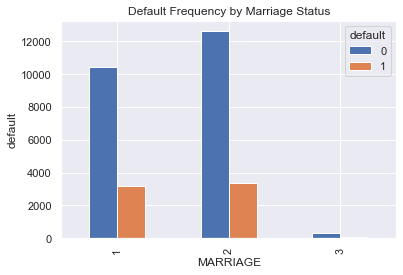

In [12]:
# Marriage
# 1: 已婚、2：未婚、3：其他

pd.crosstab(credit.MARRIAGE,credit.default).plot(kind='bar')
plt.title('Default Frequency by Marriage Status')
plt.xlabel('MARRIAGE')
plt.ylabel('default')
plt.show()

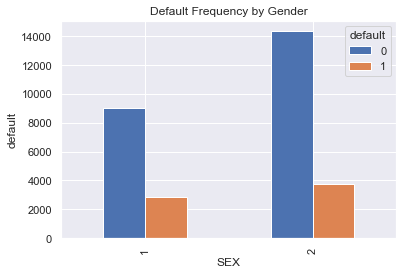

In [13]:
# SEX
# 1：男 、2：女

pd.crosstab(credit.SEX,credit.default).plot(kind='bar')
plt.title('Default Frequency by Gender')
plt.xlabel('SEX')
plt.ylabel('default')
plt.show()

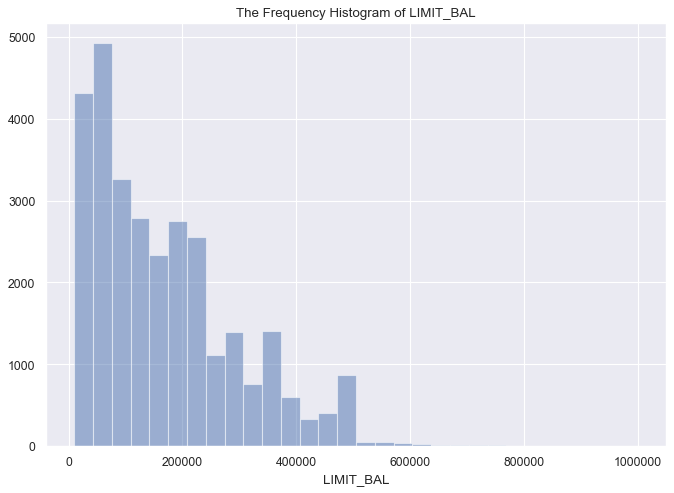

In [14]:
plt.figure(figsize=(10,7), dpi= 80)
plt.hist(credit['LIMIT_BAL'], bins=30, alpha = 0.5)
plt.xlabel('LIMIT_BAL')

plt.title("The Frequency Histogram of LIMIT_BAL")
plt.show()

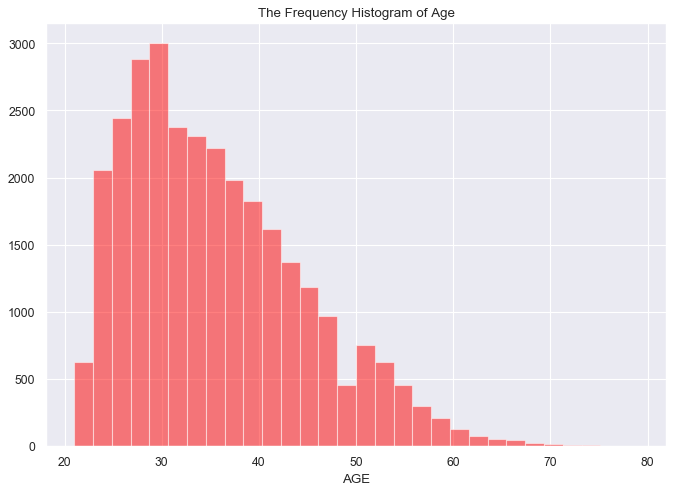

In [15]:
plt.figure(figsize=(10,7), dpi= 80)
plt.hist(credit['AGE'], bins=30, facecolor='red', alpha = 0.5)
plt.xlabel('AGE')

plt.title("The Frequency Histogram of Age")
plt.show()

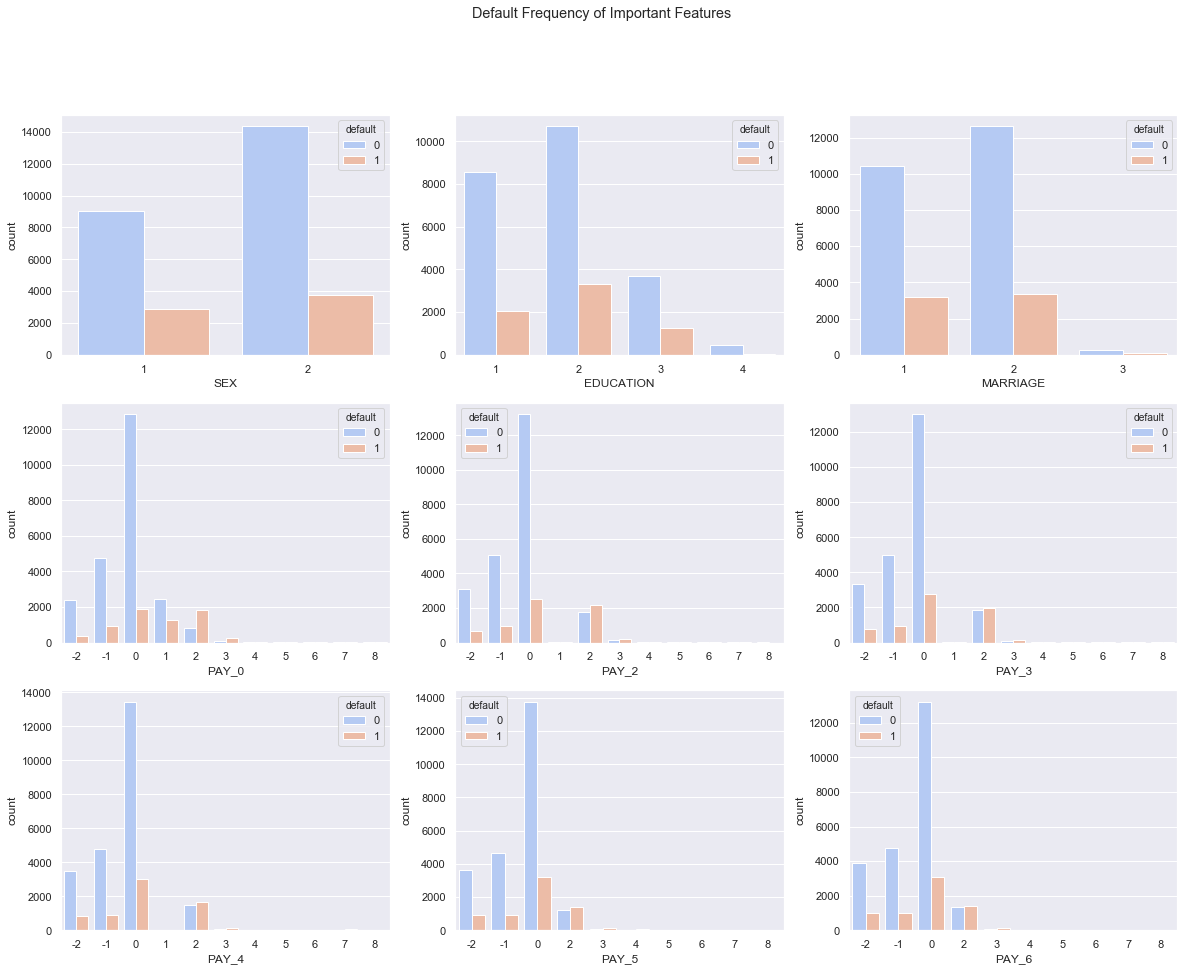

In [16]:
# Creating a new dataframe with categorical variables
subset = credit[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 
               'PAY_5', 'PAY_6', 'default']]

f, axes = plt.subplots(3, 3, figsize=(20, 15), facecolor='white')
f.suptitle('Default Frequency of Important Features')
ax1 = sns.countplot(x="SEX", hue="default", data=subset, palette="coolwarm", ax=axes[0,0])
ax2 = sns.countplot(x="EDUCATION", hue="default", data=subset, palette="coolwarm",ax=axes[0,1])
ax3 = sns.countplot(x="MARRIAGE", hue="default", data=subset, palette="coolwarm",ax=axes[0,2])
ax4 = sns.countplot(x="PAY_0", hue="default", data=subset, palette="coolwarm", ax=axes[1,0])
ax5 = sns.countplot(x="PAY_2", hue="default", data=subset, palette="coolwarm", ax=axes[1,1])
ax6 = sns.countplot(x="PAY_3", hue="default", data=subset, palette="coolwarm", ax=axes[1,2])
ax7 = sns.countplot(x="PAY_4", hue="default", data=subset, palette="coolwarm", ax=axes[2,0])
ax8 = sns.countplot(x="PAY_5", hue="default", data=subset, palette="coolwarm", ax=axes[2,1])
ax9 = sns.countplot(x="PAY_6", hue="default", data=subset, palette="coolwarm", ax=axes[2,2]);

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


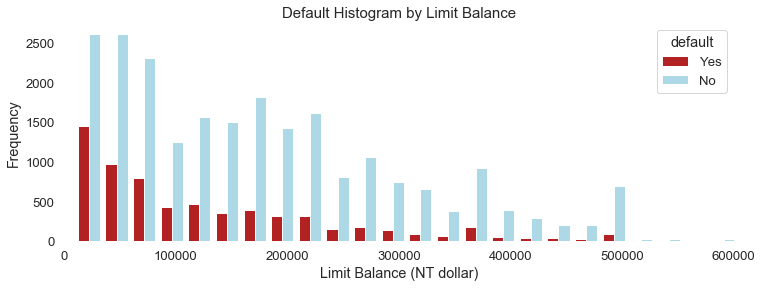

In [17]:
x1 = list(credit[credit['default'] == 1]['LIMIT_BAL'])
x2 = list(credit[credit['default'] == 0]['LIMIT_BAL'])

plt.figure(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)
#sns.set_color_codes("pastel")
plt.hist([x1, x2], bins = 40, normed=False, color=['firebrick', 'lightblue'])
plt.xlim([0,600000])
plt.legend(['Yes', 'No'], title = 'default', loc='upper right', facecolor='white')
plt.xlabel('Limit Balance (NT dollar)')
plt.ylabel('Frequency')
plt.title('Default Histogram by Limit Balance', SIZE=15)
plt.box(False)
plt.show()

## One-Hot Encoding

Each category value is converted into a new column and assigned a 1 or 0 (notation for true/false) value to the column. 

In [18]:
# 教育水平
# generate binary values using get_dummies
credit_dum = pd.get_dummies(credit, columns=["EDUCATION"], prefix=["Edu"] )
# merge with main df bridge_df on key values
credit_dum = credit.merge(credit_dum, how='outer')
credit_dum

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default  \
0         -1  ...       689         0         0         0         0        1   
1          0  ...      1000      1000      1000         0      2000        1   
2          0  ...      1500      1000      1000      1000      5000        0   
3          0  ...      2019      1200      1100      1069      1000        0   
4          0  ...     36681     10000      9000       689       679        0   
...      ...  ...       ...       ...       ...       ...       ...      ...   
29995      0  ...     20000      5003      3047      5000      1000        0   
29996     -1  ...      3526      8998       129         0         0        0   
29997     -1  ...         0     22000      4200      2000      3100        1   
29998      0  ...      3409      1178      1926     52964      1804        1   
29999      0  ...      1800      1430      1000      1000      1000        1   

       Edu_1  Edu_2  Edu_3  Edu_4  
0          0      1      0      0  
1          0      1      0      0  
2          0      1      0      0  
3          0      1      0      0  
4          0      1      0      0  
...      ...    ...    ...    ...  
29995      0      0      1      0  
29996      0      0      1      0  
29997      0      1      0      0  
29998      0      0      1      0  
29999      0      1      0      0  

[30000 rows x 29 columns]

In [19]:
# 性别
# generate binary values using get_dummies
credit_dum2 = pd.get_dummies(credit, columns=["SEX"], prefix=["SEX"] )
# merge with main df bridge_df on key values
credit_dum2 = credit_dum.merge(credit_dum2, how='outer')
credit_dum2

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  PAY_AMT4  PAY_AMT5  PAY_AMT6  default  Edu_1  Edu_2  Edu_3  \
0         -1  ...         0         0         0        1      0      1      0   
1          0  ...      1000         0      2000        1      0      1      0   
2          0  ...      1000      1000      5000        0      0      1      0   
3          0  ...      1100      1069      1000        0      0      1      0   
4          0  ...      9000       689       679        0      0      1      0   
...      ...  ...       ...       ...       ...      ...    ...    ...    ...   
29995      0  ...      3047      5000      1000        0      0      0      1   
29996     -1  ...       129         0         0        0      0      0      1   
29997     -1  ...      4200      2000      3100        1      0      1      0   
29998      0  ...      1926     52964      1804        1      0      0      1   
29999      0  ...      1000      1000      1000        1      0      1      0   

       Edu_4  SEX_1  SEX_2  
0          0      0      1  
1          0      0      1  
2          0      0      1  
3          0      0      1  
4          0      1      0  
...      ...    ...    ...  
29995      0      1      0  
29996      0      1      0  
29997      0      1      0  
29998      0      1      0  
29999      0      1      0  

[30000 rows x 31 columns]

In [20]:
# 婚姻
# generate binary values using get_dummies
credit_dum3 = pd.get_dummies(credit, columns=["MARRIAGE"], prefix=["MARRIAGE"] )
# merge with main df bridge_df on key values
credit_dum3 = credit_dum2.merge(credit_dum3, how='outer')
credit_dum3

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  default  Edu_1  Edu_2  Edu_3  Edu_4  SEX_1  SEX_2  \
0         -1  ...        1      0      1      0      0      0      1   
1          0  ...        1      0      1      0      0      0      1   
2          0  ...        0      0      1      0      0      0      1   
3          0  ...        0      0      1      0      0      0      1   
4          0  ...        0      0      1      0      0      1      0   
...      ...  ...      ...    ...    ...    ...    ...    ...    ...   
29995      0  ...        0      0      0      1      0      1      0   
29996     -1  ...        0      0      0      1      0      1      0   
29997     -1  ...        1      0      1      0      0      1      0   
29998      0  ...        1      0      0      1      0      1      0   
29999      0  ...        1      0      1      0      0      1      0   

       MARRIAGE_1  MARRIAGE_2  MARRIAGE_3  
0               1           0           0  
1               0           1           0  
2               0           1           0  
3               1           0           0  
4               1           0           0  
...           ...         ...         ...  
29995           1           0           0  
29996           0           1           0  
29997           0           1           0  
29998           1           0           0  
29999           1           0           0  

[30000 rows x 34 columns]

In [21]:
# Pay_0
# generate binary values using get_dummies
credit_dum4 = pd.get_dummies(credit, columns=["PAY_0"], prefix=["p0"] )
# merge with main df bridge_df on key values
credit_dum4 = credit_dum3.merge(credit_dum4, how='outer')
credit_dum4

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  p0_-1  p0_0  p0_1  p0_2  p0_3  p0_4  p0_5  p0_6  p0_7  p0_8  
0         -1  ...      0     0     0     1     0     0     0     0     0     0  
1          0  ...      1     0     0     0     0     0     0     0     0     0  
2          0  ...      0     1     0     0     0     0     0     0     0     0  
3          0  ...      0     1     0     0     0     0     0     0     0     0  
4          0  ...      1     0     0     0     0     0     0     0     0     0  
...      ...  ...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
29995      0  ...      0     1     0     0     0     0     0     0     0     0  
29996     -1  ...      1     0     0     0     0     0     0     0     0     0  
29997     -1  ...      0     0     0     0     0     1     0     0     0     0  
29998      0  ...      0     0     1     0     0     0     0     0     0     0  
29999      0  ...      0     1     0     0     0     0     0     0     0     0  

[30000 rows x 45 columns]

In [22]:
# Pay_2
# generate binary values using get_dummies
credit_dum5 = pd.get_dummies(credit, columns=["PAY_2"], prefix=["p2"] )
# merge with main df bridge_df on key values
credit_dum5 = credit_dum4.merge(credit_dum5, how='outer')
credit_dum5

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  p2_-1  p2_0  p2_1  p2_2  p2_3  p2_4  p2_5  p2_6  p2_7  p2_8  
0         -1  ...      0     0     0     1     0     0     0     0     0     0  
1          0  ...      0     0     0     1     0     0     0     0     0     0  
2          0  ...      0     1     0     0     0     0     0     0     0     0  
3          0  ...      0     1     0     0     0     0     0     0     0     0  
4          0  ...      0     1     0     0     0     0     0     0     0     0  
...      ...  ...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
29995      0  ...      0     1     0     0     0     0     0     0     0     0  
29996     -1  ...      1     0     0     0     0     0     0     0     0     0  
29997     -1  ...      0     0     0     0     1     0     0     0     0     0  
29998      0  ...      1     0     0     0     0     0     0     0     0     0  
29999      0  ...      0     1     0     0     0     0     0     0     0     0  

[30000 rows x 56 columns]

In [23]:
# Pay_3
# generate binary values using get_dummies
credit_dum6 = pd.get_dummies(credit, columns=["PAY_3"], prefix=["p3"] )
# merge with main df bridge_df on key values
credit_dum6 = credit_dum5.merge(credit_dum6, how='outer')
credit_dum6

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  p3_-1  p3_0  p3_1  p3_2  p3_3  p3_4  p3_5  p3_6  p3_7  p3_8  
0         -1  ...      1     0     0     0     0     0     0     0     0     0  
1          0  ...      0     1     0     0     0     0     0     0     0     0  
2          0  ...      0     1     0     0     0     0     0     0     0     0  
3          0  ...      0     1     0     0     0     0     0     0     0     0  
4          0  ...      1     0     0     0     0     0     0     0     0     0  
...      ...  ...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
29995      0  ...      0     1     0     0     0     0     0     0     0     0  
29996     -1  ...      1     0     0     0     0     0     0     0     0     0  
29997     -1  ...      0     0     0     1     0     0     0     0     0     0  
29998      0  ...      0     1     0     0     0     0     0     0     0     0  
29999      0  ...      0     1     0     0     0     0     0     0     0     0  

[30000 rows x 67 columns]

In [24]:
# Pay_4
# generate binary values using get_dummies
credit_dum7 = pd.get_dummies(credit, columns=["PAY_4"], prefix=["p4"] )
# merge with main df bridge_df on key values
credit_dum7 = credit_dum6.merge(credit_dum7, how='outer')
credit_dum7

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  p4_-1  p4_0  p4_1  p4_2  p4_3  p4_4  p4_5  p4_6  p4_7  p4_8  
0         -1  ...      1     0     0     0     0     0     0     0     0     0  
1          0  ...      0     1     0     0     0     0     0     0     0     0  
2          0  ...      0     1     0     0     0     0     0     0     0     0  
3          0  ...      0     1     0     0     0     0     0     0     0     0  
4          0  ...      0     1     0     0     0     0     0     0     0     0  
...      ...  ...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
29995      0  ...      0     1     0     0     0     0     0     0     0     0  
29996     -1  ...      1     0     0     0     0     0     0     0     0     0  
29997     -1  ...      1     0     0     0     0     0     0     0     0     0  
29998      0  ...      0     1     0     0     0     0     0     0     0     0  
29999      0  ...      0     1     0     0     0     0     0     0     0     0  

[30000 rows x 78 columns]

In [25]:
# Pay_5
# generate binary values using get_dummies
credit_dum8 = pd.get_dummies(credit, columns=["PAY_5"], prefix=["p5"] )
# merge with main df bridge_df on key values
credit_dum8 = credit_dum7.merge(credit_dum8, how='outer')
credit_dum8

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  p5_-2  p5_-1  p5_0  p5_2  p5_3  p5_4  p5_5  p5_6  p5_7  \
0         -1  ...      1      0     0     0     0     0     0     0     0   
1          0  ...      0      0     1     0     0     0     0     0     0   
2          0  ...      0      0     1     0     0     0     0     0     0   
3          0  ...      0      0     1     0     0     0     0     0     0   
4          0  ...      0      0     1     0     0     0     0     0     0   
...      ...  ...    ...    ...   ...   ...   ...   ...   ...   ...   ...   
29995      0  ...      0      0     1     0     0     0     0     0     0   
29996     -1  ...      0      0     1     0     0     0     0     0     0   
29997     -1  ...      0      0     1     0     0     0     0     0     0   
29998      0  ...      0      0     1     0     0     0     0     0     0   
29999      0  ...      0      0     1     0     0     0     0     0     0   

       p5_8  
0         0  
1         0  
2         0  
3         0  
4         0  
...     ...  
29995     0  
29996     0  
29997     0  
29998     0  
29999     0  

[30000 rows x 88 columns]

In [26]:
# Pay_6
# generate binary values using get_dummies
credit_dum9 = pd.get_dummies(credit, columns=["PAY_6"], prefix=["p6"] )
# merge with main df bridge_df on key values
credit_dum9 = credit_dum8.merge(credit_dum9, how='outer')
credit_dum9

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  p6_-2  p6_-1  p6_0  p6_2  p6_3  p6_4  p6_5  p6_6  p6_7  \
0         -1  ...      1      0     0     0     0     0     0     0     0   
1          0  ...      0      0     0     1     0     0     0     0     0   
2          0  ...      0      0     1     0     0     0     0     0     0   
3          0  ...      0      0     1     0     0     0     0     0     0   
4          0  ...      0      0     1     0     0     0     0     0     0   
...      ...  ...    ...    ...   ...   ...   ...   ...   ...   ...   ...   
29995      0  ...      0      0     1     0     0     0     0     0     0   
29996     -1  ...      0      0     1     0     0     0     0     0     0   
29997     -1  ...      0      0     1     0     0     0     0     0     0   
29998      0  ...      0      1     0     0     0     0     0     0     0   
29999      0  ...      0      0     1     0     0     0     0     0     0   

       p6_8  
0         0  
1         0  
2         0  
3         0  
4         0  
...     ...  
29995     0  
29996     0  
29997     0  
29998     0  
29999     0  

[30000 rows x 98 columns]

In [27]:
credit_dum9 = credit_dum9.drop(['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'],axis=1)
credit_dum9

ID  LIMIT_BAL  AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
0          1      20000   24       3913       3102        689          0   
1          2     120000   26       2682       1725       2682       3272   
2          3      90000   34      29239      14027      13559      14331   
3          4      50000   37      46990      48233      49291      28314   
4          5      50000   57       8617       5670      35835      20940   
...      ...        ...  ...        ...        ...        ...        ...   
29995  29996     220000   39     188948     192815     208365      88004   
29996  29997     150000   43       1683       1828       3502       8979   
29997  29998      30000   37       3565       3356       2758      20878   
29998  29999      80000   41      -1645      78379      76304      52774   
29999  30000      50000   46      47929      48905      49764      36535   

       BILL_AMT5  BILL_AMT6  PAY_AMT1  ...  p6_-2  p6_-1  p6_0  p6_2  p6_3  \
0              0          0         0  ...      1      0     0     0     0   
1           3455       3261         0  ...      0      0     0     1     0   
2          14948      15549      1518  ...      0      0     1     0     0   
3          28959      29547      2000  ...      0      0     1     0     0   
4          19146      19131      2000  ...      0      0     1     0     0   
...          ...        ...       ...  ...    ...    ...   ...   ...   ...   
29995      31237      15980      8500  ...      0      0     1     0     0   
29996       5190          0      1837  ...      0      0     1     0     0   
29997      20582      19357         0  ...      0      0     1     0     0   
29998      11855      48944     85900  ...      0      1     0     0     0   
29999      32428      15313      2078  ...      0      0     1     0     0   

       p6_4  p6_5  p6_6  p6_7  p6_8  
0         0     0     0     0     0  
1         0     0     0     0     0  
2         0     0     0     0     0  
3         0     0     0     0     0  
4         0     0     0     0     0  
...     ...   ...   ...   ...   ...  
29995     0     0     0     0     0  
29996     0     0     0     0     0  
29997     0     0     0     0     0  
29998     0     0     0     0     0  
29999     0     0     0     0     0  

[30000 rows x 89 columns]

In [28]:
credit_dum9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 89 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   ID          30000 non-null  int64
 1   LIMIT_BAL   30000 non-null  int64
 2   AGE         30000 non-null  int64
 3   BILL_AMT1   30000 non-null  int64
 4   BILL_AMT2   30000 non-null  int64
 5   BILL_AMT3   30000 non-null  int64
 6   BILL_AMT4   30000 non-null  int64
 7   BILL_AMT5   30000 non-null  int64
 8   BILL_AMT6   30000 non-null  int64
 9   PAY_AMT1    30000 non-null  int64
 10  PAY_AMT2    30000 non-null  int64
 11  PAY_AMT3    30000 non-null  int64
 12  PAY_AMT4    30000 non-null  int64
 13  PAY_AMT5    30000 non-null  int64
 14  PAY_AMT6    30000 non-null  int64
 15  default     30000 non-null  int64
 16  Edu_1       30000 non-null  uint8
 17  Edu_2       30000 non-null  uint8
 18  Edu_3       30000 non-null  uint8
 19  Edu_4       30000 non-null  uint8
 20  SEX_1       30000 non-null  

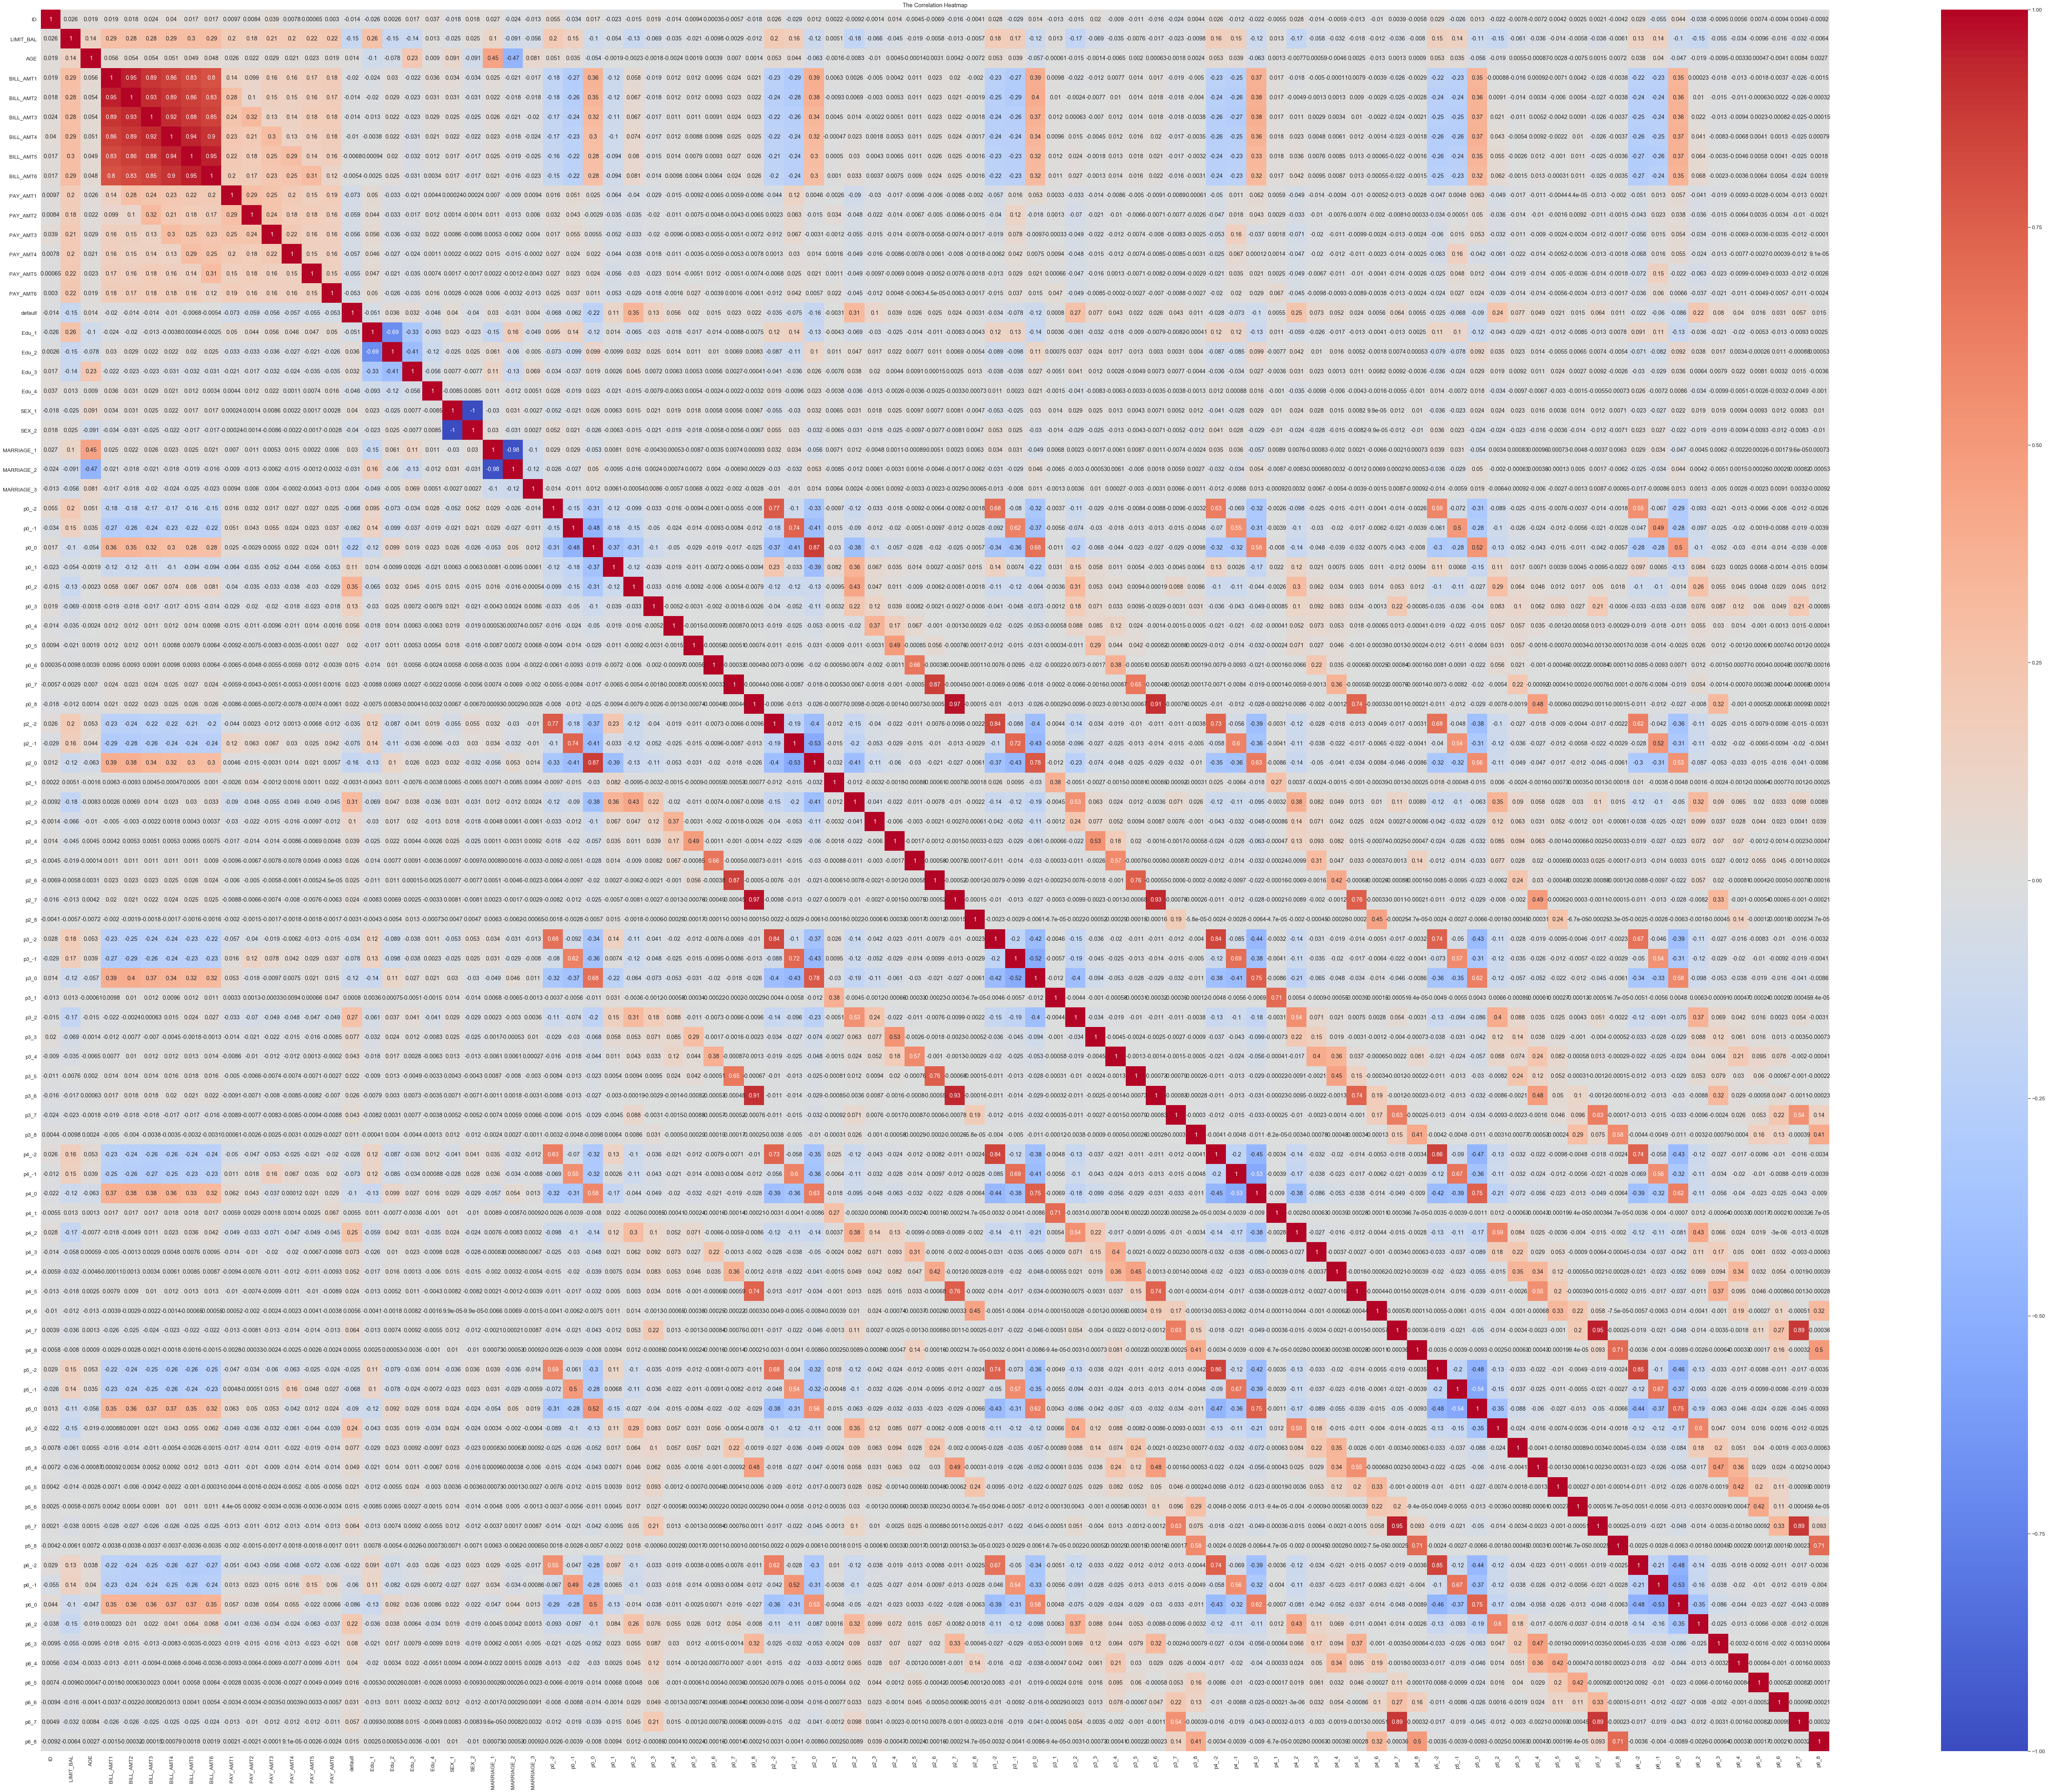

In [34]:
plt.figure(figsize = (100,80))
hm = credit_dum9.corr()

sns.heatmap(hm, cmap = 'coolwarm', annot=True)
plt.title('The Correlation Heatmap')
plt.show()

# Normalization: Applying MinMax Scaler

In [105]:
minmax_scale = prep.MinMaxScaler().fit(credit_dum9)
credit_minmax = minmax_scale.transform(credit_dum9)
credit_minmax = pd.DataFrame(credit_minmax, columns = list(credit_dum9))
credit_minmax

ID  LIMIT_BAL       AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  \
0      0.000000   0.010101  0.051724   0.149982   0.069164   0.086723   
1      0.000033   0.111111  0.086207   0.148892   0.067858   0.087817   
2      0.000067   0.080808  0.224138   0.172392   0.079532   0.093789   
3      0.000100   0.040404  0.275862   0.188100   0.111995   0.113407   
4      0.000133   0.040404  0.620690   0.154144   0.071601   0.106020   
...         ...        ...       ...        ...        ...        ...   
29995  0.999867   0.212121  0.310345   0.313716   0.249208   0.200746   
29996  0.999900   0.141414  0.379310   0.148008   0.067955   0.088267   
29997  0.999933   0.020202  0.275862   0.149674   0.069405   0.087859   
29998  0.999967   0.070707  0.344828   0.145064   0.140604   0.128239   
29999  1.000000   0.040404  0.431034   0.188931   0.112633   0.113667   

       BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  ...  p6_-2  p6_-1  p6_0  \
0       0.160138   0.080648   0.260979  0.000000  ...    1.0    0.0   0.0   
1       0.163220   0.084074   0.263485  0.000000  ...    0.0    0.0   0.0   
2       0.173637   0.095470   0.272928  0.001738  ...    0.0    0.0   1.0   
3       0.186809   0.109363   0.283685  0.002290  ...    0.0    0.0   1.0   
4       0.179863   0.099633   0.275681  0.002290  ...    0.0    0.0   1.0   
...          ...        ...        ...       ...  ...    ...    ...   ...   
29995   0.243036   0.111622   0.273259  0.009730  ...    0.0    0.0   1.0   
29996   0.168596   0.085794   0.260979  0.002103  ...    0.0    0.0   1.0   
29997   0.179805   0.101057   0.275854  0.000000  ...    0.0    0.0   1.0   
29998   0.209850   0.092403   0.298591  0.098334  ...    0.0    1.0   0.0   
29999   0.194553   0.112803   0.272746  0.002379  ...    0.0    0.0   1.0   

       p6_2  p6_3  p6_4  p6_5  p6_6  p6_7  p6_8  
0       0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1       1.0   0.0   0.0   0.0   0.0   0.0   0.0  
2       0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3       0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4       0.0   0.0   0.0   0.0   0.0   0.0   0.0  
...     ...   ...   ...   ...   ...   ...   ...  
29995   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
29996   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
29997   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
29998   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
29999   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[30000 rows x 89 columns]

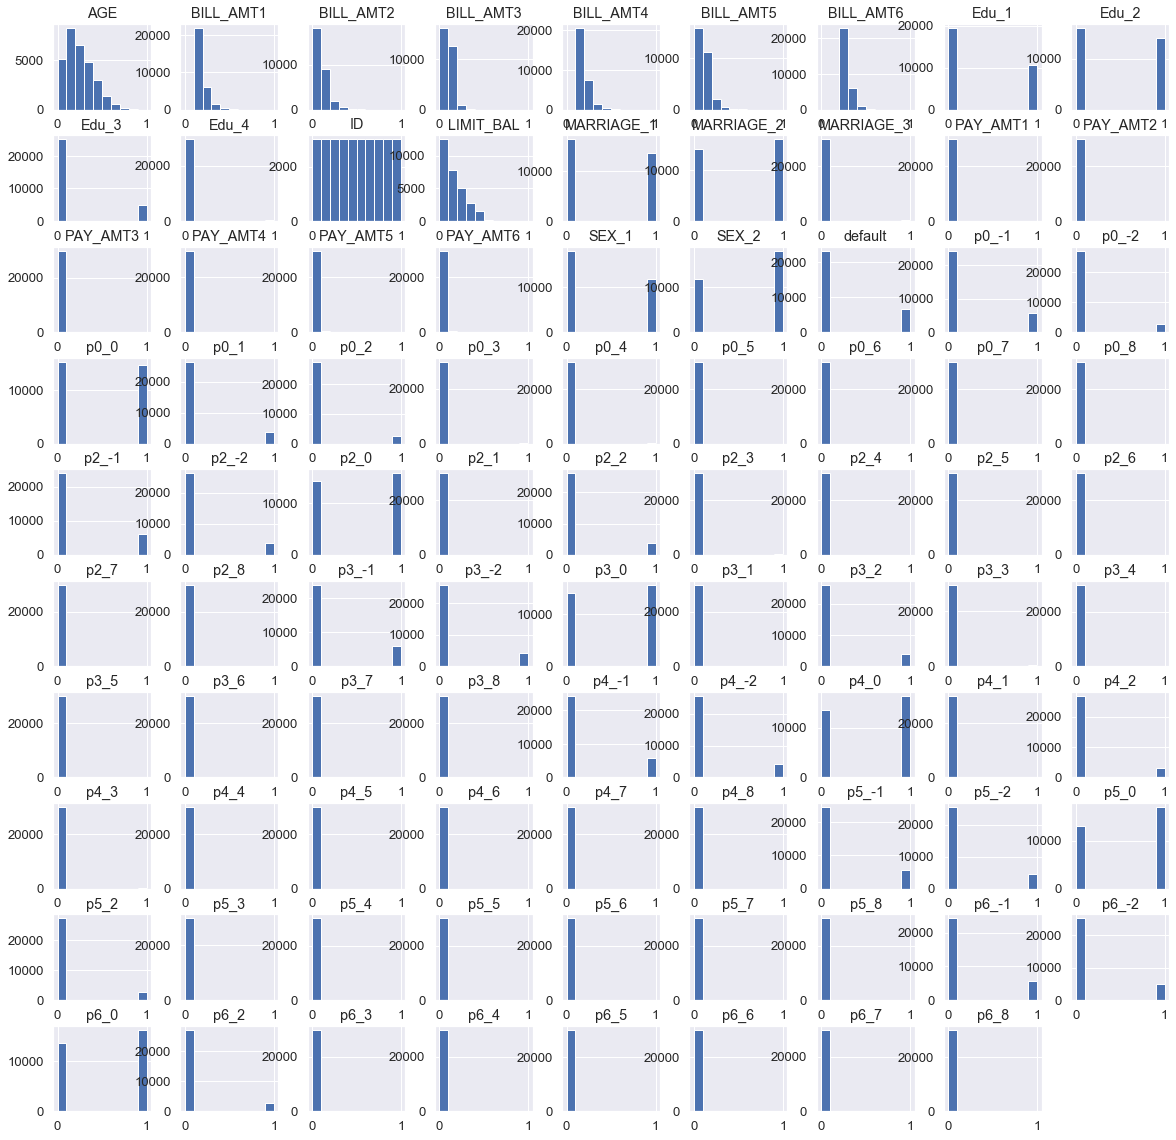

In [106]:
credit_minmax.hist(figsize=(20,20))
plt.show()

# Dividing the data into train and test

In [107]:
X = credit_minmax.drop(["default"],axis=1)
y = credit_minmax["default"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [108]:
# describes info about train and test set 
print("Number transactions X_train dataset: ", X_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions X_test dataset: ", X_test.shape) 
print("Number transactions y_test dataset: ", y_test.shape) 

Number transactions X_train dataset:  (24000, 88)
Number transactions y_train dataset:  (24000,)
Number transactions X_test dataset:  (6000, 88)
Number transactions y_test dataset:  (6000,)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  Returns


Accuracy:
0.8268333333333333
f1 Score: 0.4739240506329113
[[4493  210]
 [ 829  468]]
              precision    recall  f1-score   support

         0.0       0.84      0.96      0.90      4703
         1.0       0.69      0.36      0.47      1297

    accuracy                           0.83      6000
   macro avg       0.77      0.66      0.69      6000
weighted avg       0.81      0.83      0.81      6000



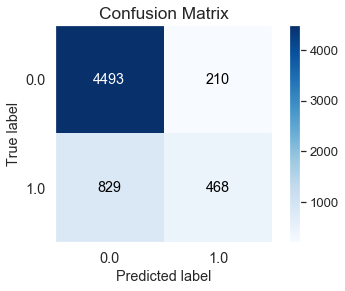

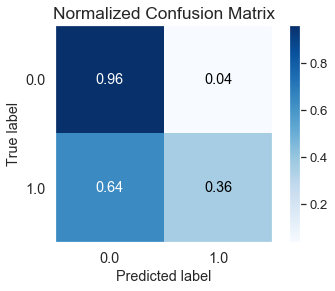

In [110]:
# Run the logistic regression model on Imbalanced data
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
prediction = logreg.predict(X_test)
print("Accuracy:")
a = accuracy_score(y_test,prediction)
print(a)

prediction = dict()
prediction['Logistic'] = logreg.predict(X_test)
print('f1 Score:' ,metrics.f1_score(y_test, prediction['Logistic']))

confusion_matrix = cm(y_test, prediction['Logistic'])
print(confusion_matrix)

print(classification_report(y_test, prediction['Logistic']))

skplt.metrics.plot_confusion_matrix(y_test, prediction['Logistic'])
plt.show()
skplt.metrics.plot_confusion_matrix(y_test,prediction['Logistic'],normalize=True)
plt.show()

# Oversampling on Training Set

In [111]:
# define training set
df_train = pd.concat([X_train, y_train],axis=1)
df_train

ID  LIMIT_BAL       AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  \
3225   0.107504   0.010101  0.396552   0.161646   0.084358   0.096216   
11815  0.393846   0.252525  0.155172   0.146665   0.066377   0.086495   
7338   0.244608   0.010101  0.310345   0.164450   0.085512   0.096941   
14980  0.499350   0.020202  0.034483   0.171494   0.094004   0.102066   
27167  0.905597   0.000000  0.137931   0.153842   0.074201   0.091066   
...         ...        ...       ...        ...        ...        ...   
13123  0.437448   0.020202  0.293103   0.170256   0.083684   0.096465   
19648  0.654955   0.202020  0.206897   0.323364   0.247059   0.192154   
9845   0.328178   0.121212  0.379310   0.212018   0.134102   0.122785   
10799  0.359979   0.040404  0.137931   0.186835   0.111130   0.113277   
2732   0.091070   0.131313  0.068966   0.167233   0.089685   0.100623   

       BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  ...  p6_-1  p6_0  p6_2  \
3225    0.177828   0.080648   0.260979  0.003434  ...    0.0   0.0   0.0   
11815   0.160293   0.080978   0.261106  0.000189  ...    1.0   0.0   0.0   
7338    0.178910   0.100682   0.276654  0.001717  ...    0.0   1.0   0.0   
14980   0.188517   0.110916   0.283874  0.002061  ...    0.0   0.0   1.0   
27167   0.169058   0.087282   0.268425  0.003205  ...    0.0   1.0   0.0   
...          ...        ...        ...       ...  ...    ...   ...   ...   
13123   0.176947   0.098731   0.269355  0.002404  ...    0.0   1.0   0.0   
19648   0.344485   0.229904   0.366695  0.008013  ...    0.0   1.0   0.0   
9845    0.201474   0.121365   0.283430  0.005724  ...    0.0   0.0   1.0   
10799   0.167088   0.088683   0.267867  0.002862  ...    0.0   1.0   0.0   
2732    0.185356   0.108589   0.283838  0.002290  ...    0.0   1.0   0.0   

       p6_3  p6_4  p6_5  p6_6  p6_7  p6_8  default  
3225    0.0   0.0   0.0   0.0   0.0   0.0      0.0  
11815   0.0   0.0   0.0   0.0   0.0   0.0      0.0  
7338    0.0   0.0   0.0   0.0   0.0   0.0      1.0  
14980   0.0   0.0   0.0   0.0   0.0   0.0      1.0  
27167   0.0   0.0   0.0   0.0   0.0   0.0      1.0  
...     ...   ...   ...   ...   ...   ...      ...  
13123   0.0   0.0   0.0   0.0   0.0   0.0      0.0  
19648   0.0   0.0   0.0   0.0   0.0   0.0      1.0  
9845    0.0   0.0   0.0   0.0   0.0   0.0      0.0  
10799   0.0   0.0   0.0   0.0   0.0   0.0      0.0  
2732    0.0   0.0   0.0   0.0   0.0   0.0      0.0  

[24000 rows x 89 columns]

In [112]:
# define test set
df_test = pd.concat([X_test, y_test],axis=1)
df_test

ID  LIMIT_BAL       AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  \
8225   0.274176   0.010101  0.206897   0.162421   0.082733   0.096808   
10794  0.359812   0.010101  0.241379   0.161145   0.084581   0.096557   
9163   0.305444   0.222222  0.396552   0.149956   0.067121   0.087917   
26591  0.886396   0.090909  0.362069   0.233618   0.161121   0.095205   
6631   0.221041   0.141414  0.137931   0.150575   0.072785   0.086801   
...         ...        ...       ...        ...        ...        ...   
12715  0.423847   0.242424  0.241379   0.320126   0.248192   0.199272   
28867  0.962265   0.202020  0.431034   0.191401   0.115735   0.113224   
3758   0.125271   0.070707  0.103448   0.166324   0.077058   0.090199   
17842  0.594753   0.010101  0.051724   0.160889   0.081667   0.095522   
9119   0.303977   0.040404  0.327586   0.190948   0.063827   0.086569   

       BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  ...  p6_-1  p6_0  p6_2  \
8225    0.177520   0.100236   0.275801  0.000000  ...    0.0   0.0   1.0   
10794   0.178036   0.099488   0.276348  0.003892  ...    0.0   1.0   0.0   
9163    0.161017   0.080648   0.260979  0.001086  ...    0.0   0.0   0.0   
26591   0.176866   0.099264   0.276557  0.005724  ...    0.0   1.0   0.0   
6631    0.166231   0.085743   0.266981  0.008001  ...    0.0   0.0   0.0   
...          ...        ...        ...       ...  ...    ...   ...   ...   
12715   0.349466   0.296641   0.432545  0.000000  ...    0.0   0.0   1.0   
28867   0.207094   0.139210   0.307410  0.003561  ...    0.0   1.0   0.0   
3758    0.165938   0.088190   0.263616  0.001717  ...    0.0   1.0   0.0   
17842   0.177402   0.098234   0.275923  0.000687  ...    0.0   0.0   1.0   
9119    0.187595   0.110663   0.278511  0.000000  ...    0.0   1.0   0.0   

       p6_3  p6_4  p6_5  p6_6  p6_7  p6_8  default  
8225    0.0   0.0   0.0   0.0   0.0   0.0      0.0  
10794   0.0   0.0   0.0   0.0   0.0   0.0      0.0  
9163    0.0   0.0   0.0   0.0   0.0   0.0      0.0  
26591   0.0   0.0   0.0   0.0   0.0   0.0      0.0  
6631    0.0   0.0   0.0   0.0   0.0   0.0      0.0  
...     ...   ...   ...   ...   ...   ...      ...  
12715   0.0   0.0   0.0   0.0   0.0   0.0      0.0  
28867   0.0   0.0   0.0   0.0   0.0   0.0      0.0  
3758    0.0   0.0   0.0   0.0   0.0   0.0      1.0  
17842   0.0   0.0   0.0   0.0   0.0   0.0      0.0  
9119    0.0   0.0   0.0   0.0   0.0   0.0      0.0  

[6000 rows x 89 columns]

In [113]:
# summarize target variable distribution (training set)
count_class_0, count_class_1 = df_train.default.value_counts()
count_class_0, count_class_1

(18661, 5339)

Random Oversampling:
1.0    18661
0.0    18661
Name: default, dtype: int64


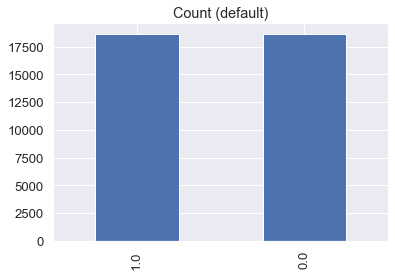

In [114]:
# Separate majority and minority classes
df_majority = df_train[df_train.default==0]
df_minority = df_train[df_train.default==1]

df_minority_upsampled = df_minority.sample(count_class_0, replace=True)
df_upsampled = pd.concat([df_majority,df_minority_upsampled],axis=0)
 
print('Random Oversampling:')
print(df_upsampled.default.value_counts())
 

df_upsampled.default.value_counts().plot(kind='bar', title='Count (default)');

# Splitting the new upsampled dataset

In [175]:
X_train_upsampled = df_upsampled.drop(["default"],axis=1)
y_train_upsampled = df_upsampled["default"]

# 机器学习 Machine Learning

分类问题 Classification
- 逻辑回归 Logistic regression
- 决策树 Decision tree
- 随机森林 Random forest
- 支持向量 Support Vector Classifications
- Stocastic Gradient Descend
- K-Nearest Neighbours Classifiers
- Gaussian Process Classification
- Other ensemble
- 神经网络 Neural Network Models
- XGBoost

# Logistic Regression


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  Returns


[[3118  581]
 [1576 2190]]


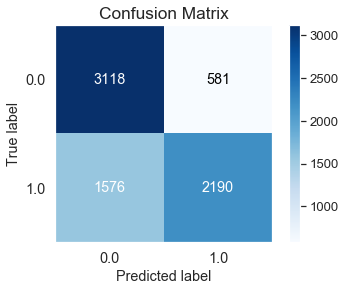

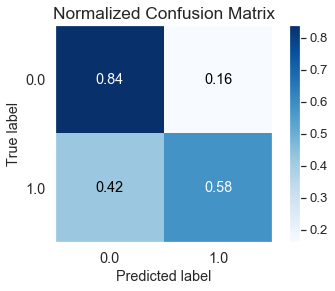

              precision    recall  f1-score   support

         0.0       0.66      0.84      0.74      3699
         1.0       0.79      0.58      0.67      3766

    accuracy                           0.71      7465
   macro avg       0.73      0.71      0.71      7465
weighted avg       0.73      0.71      0.71      7465



In [176]:
# Run the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train_upsampled, y_train_upsampled)
y_pred = logreg.predict(X_test)
confusion_matrix = cm(y_test, y_pred)
print(confusion_matrix)

skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
skplt.metrics.plot_confusion_matrix(y_test,y_pred,normalize=True)
plt.show()

print(classification_report(y_test, y_pred))

#  Area Under ROC Curve

# Support Vector Classification


# Random Forest

0.9985264567983925
[[3689   10]
 [   1 3765]]


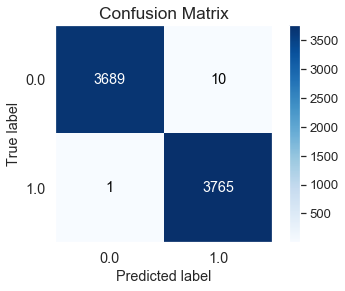

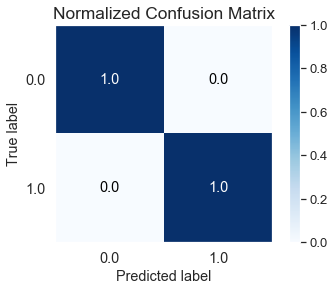

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3699
         1.0       1.00      1.00      1.00      3766

    accuracy                           1.00      7465
   macro avg       1.00      1.00      1.00      7465
weighted avg       1.00      1.00      1.00      7465



In [178]:
clf = RandomForestClassifier(n_jobs=1000,
                            random_state=9,
                            n_estimators=11,
                            verbose=False)
clf.fit(X_train_upsampled, y_train_upsampled)
prediction['RandomForest'] = clf.predict(X_test)
r = accuracy_score(prediction['RandomForest'],y_test)
print(r)

confusion_matrix = cm(y_test, prediction['RandomForest'])
print(confusion_matrix)

skplt.metrics.plot_confusion_matrix(y_test, prediction['RandomForest'])
plt.show()
skplt.metrics.plot_confusion_matrix(y_test,prediction['RandomForest'],normalize=True)
plt.show()

print(classification_report(y_test, prediction['RandomForest']))

# Decision Tree Classifier

The Classification Report of Decision Tree Model
              precision    recall  f1-score   support

         0.0       0.61      0.91      0.73      3699
         1.0       0.84      0.44      0.57      3766

    accuracy                           0.67      7465
   macro avg       0.73      0.68      0.65      7465
weighted avg       0.73      0.67      0.65      7465

[[3377  322]
 [2117 1649]]


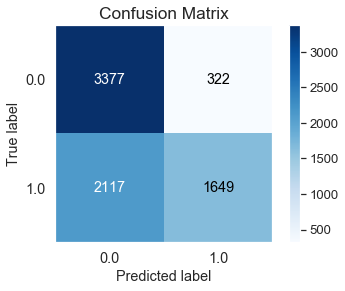

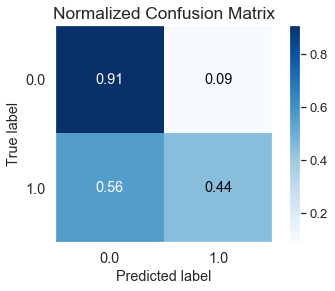

In [179]:
clf_gini = DecisionTreeClassifier(criterion = 'gini', random_state = 100,
                                 max_depth = 3, min_samples_leaf = 5)
clf_gini.fit(X_train_upsampled, y_train_upsampled)

prediction['DecisionTree'] = clf_gini.predict(X_test)
print("The Classification Report of Decision Tree Model")
t = classification_report(y_test, prediction['DecisionTree'])
print(t)

confusion_matrix = cm(y_test, prediction['DecisionTree'])
print(confusion_matrix)

skplt.metrics.plot_confusion_matrix(y_test, prediction['DecisionTree'])
plt.show()
skplt.metrics.plot_confusion_matrix(y_test,prediction['DecisionTree'],normalize=True)
plt.show()

In [186]:
from sklearn import datasets,tree
from sklearn import externals
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import pydot

dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png())

ModuleNotFoundError: No module named 'sklearn.externals.six'

# K-Nearest Neighbors

[[2866  833]
 [ 169 3597]]
              precision    recall  f1-score   support

         0.0       0.94      0.77      0.85      3699
         1.0       0.81      0.96      0.88      3766

    accuracy                           0.87      7465
   macro avg       0.88      0.86      0.86      7465
weighted avg       0.88      0.87      0.86      7465



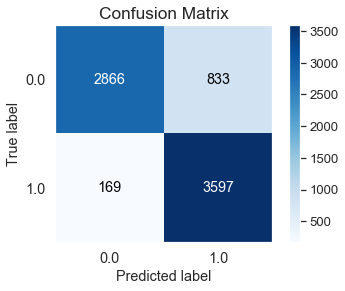

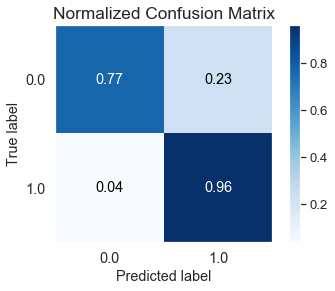

In [180]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_upsampled,y_train_upsampled)
pred = knn.predict(X_test)
print(cm(y_test,pred))
print(classification_report(y_test,pred))
skplt.metrics.plot_confusion_matrix(y_test, pred)
plt.show()
skplt.metrics.plot_confusion_matrix(y_test,pred,normalize=True)
plt.show()

In [149]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_upsampled, y_train_upsampled)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

KeyboardInterrupt: 

# Model Comparison

In [181]:
random_seed = 12

In [182]:
outcome = []
model_names = []
models = [('LogReg', LogisticRegression()),  
          ('DecTree', DecisionTreeClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('RandomForest', RandomForestClassifier())]

In [183]:
from sklearn import model_selection
for model_name, model in models:
    k_fold_validation = model_selection.KFold(n_splits=10, random_state=random_seed)
    results = model_selection.cross_val_score(model, X_train_upsampled, y_train_upsampled, cv=k_fold_validation, scoring='accuracy')
    outcome.append(results)
    model_names.append(model_name)
    output_message = "%s| Mean=%f STD=%f" % (model_name, results.mean(), results.std())
    print(output_message)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  'random_state to its default (None), or set shuffle=True.',
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  Returns
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



LogReg| Mean=0.649182 STD=0.118923
DecTree| Mean=0.882058 STD=0.082843


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  'random_state to its default (None), or set shuffle=True.',


KNN| Mean=0.727565 STD=0.092007


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  'random_state to its default (None), or set shuffle=True.',


RandomForest| Mean=0.934330 STD=0.033371


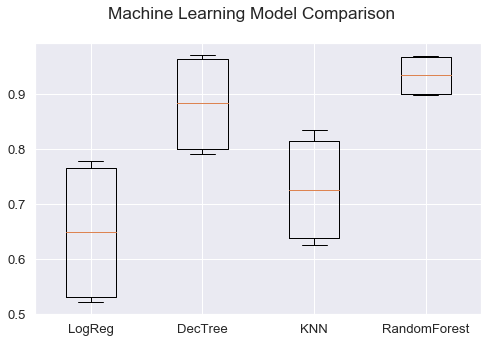

In [184]:
fig = plt.figure(figsize=(8,5))
fig.suptitle('Machine Learning Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(outcome)
ax.set_xticklabels(model_names)
plt.show()

neighbors = np.arange(1, 40) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 
  
# Loop over K values 
for i, k in enumerate(neighbors): 
    knn1 = KNeighborsClassifier(n_neighbors=k) 
    knn1.fit(X_train, y_train) 
      
    # Compute traning and test data accuracy 
    train_accuracy[i] = knn1.score(X_train, y_train) 
    test_accuracy[i] = knn1.score(X_test, y_test) 
  
# Generate plot 
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 
  
plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.show() 

In [ ]:
k = accuracy_score(y_test, prediction['KNN'])
print(k)
confusion_matrix = cm(y_test, prediction['KNN'])
print(confusion_matrix)
skplt.metrics.plot_confusion_matrix(y_test, prediction['KNN'])
plt.show()
skplt.metrics.plot_confusion_matrix(y_test,prediction['KNN'],normalize=True)
plt.show()

average_precision = metrics.average_precision_score(y_test,prediction['KNN'])
print('The Average Precision-recall Score: {0:0.2f}'.format(average_precision))

print("The Classification Report of KNN Model")
k = classification_report(y_test, prediction['KNN'])
print(k)

In [ ]:
from sklearn import decomposition, datasets


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
pca.fit(df_upsampled)
reduced = pca.transform(df_upsampled)

In [ ]:
pca = PCA().fit(df_upsampled)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 11, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [ ]:
df_upsampled.shape()

In [ ]:
# Create a pca object with the 2 components as a parameter
pca = decomposition.PCA(n_components=2)

# Fit the PCA and transform the data
X_std_pca = pca.fit_transform(X_std)